<h3>Tokenizer</h3>

In [ ]:
# !pip install tensorflow
# !pip install keras
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install nltk
# !pip install -U scikit-learn

In [32]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk
from nltk.tree import Tree

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\michaeletelamaki\AppDa

True

Original Sentences: ['Mexico is almost certain to elect its first female president in June — both leading candidates are women — but it ’ s almost equally as certain that she won ’ t have much room to act independently of outgoing President Andrés Manuel López Obrador .', 'The populist president has continued proposing new , expensive projects in the closing months of his administration , before he leaves office on Sept. 30 .', 'He will also leave a lot of big-ticket projects unfinished .', 'That will probably leave his successor with her hands tied for much of her six-year term .', 'Even if opposition candidate Xóchitl Gálvez wins , a mountain of financial commitments will weigh on her .', 'The candidate of López Obrador ’ s party , former Mexico City mayor Claudia Sheinbaum , leads in polls .', 'A third male candidate from a small party has almost no chance of winning .', '“ The next administration will inherit a country with a financial hole that will limit the maneuvering room thro

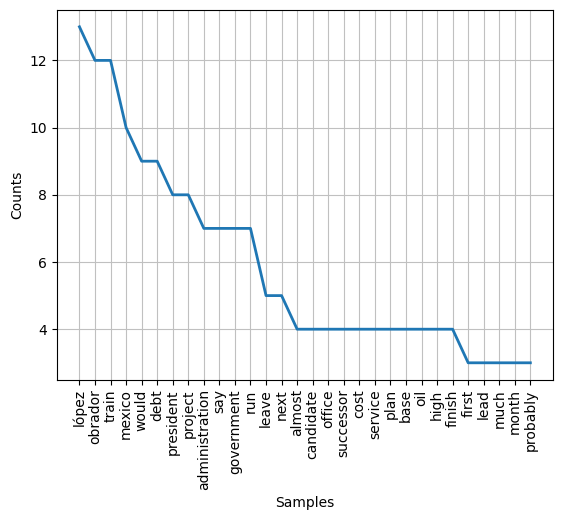

In [56]:
# Sample text for analysis
# text = '''
# Peter and Elizabeth took a taxi to attend the night party in the city. While in the party, Elizabeth collapsed and was rushed to the hospital. Since she was diagnosed with a brain injury, the doctor told Peter to stay besides her until she gets well. 
# Therefore, Peter stayed with her at the hospital for 3 days without leaving. John works at Microsoft, and he is a good friend of Peter. He visited Peter at the hospital and brought some fruits for Elizabeth. 
# Peter was very happy to see John and thanked him for the fruits. After 3 days, Elizabeth was discharged from the hospital, and Peter took her home. John said it was Mount Sinai Hospital.
# '''

text = '''

'''

# Step 5: Expand Contractions
contractions = {
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'m": "am",
    "'ll": "will",
    "'d": "would",
    "'ve": "have"
}
expanded_text = ' '.join([contractions.get(word, word) for word in word_tokenize(text)])

# Step 1: Tokenization of sentences
sentences = sent_tokenize(expanded_text)

# Step 2: Tokenization of words within sentences
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Step 4: Lowercasing
lowercased_tokens = [
    [word.lower() for word in tokens] 
    for tokens in tokenized_sentences]

# Step 3: Remove Punctuation
filtered_tokens = [
    [word for word in tokens if word.isalpha()] 
    for tokens in lowercased_tokens]

# Step 6: Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [
    [word for word in tokens if word not in stop_words] 
    for tokens in filtered_tokens]

# Step 7: Part of Speech Tagging (POS)
pos_tags = [pos_tag(tokens) for tokens in filtered_tokens]

# Step 8: Named Entity Recognition (NER)
def extract_entities(pos_tags):
    entities = []
    for sent_tags in pos_tags:
        chunked = ne_chunk(sent_tags)
        for subtree in chunked:
            if isinstance(subtree, Tree) and subtree.label() == 'NE':
                entity = " ".join([token[0] for token in subtree.leaves()])
                entities.append(entity)
    return entities

# Extract named entities
entities = extract_entities(pos_tags)

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Step 9: Lemmatization
lemmatizer = WordNetLemmatizer()
lemma_tokens = [
    [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags_i] 
    for pos_tags_i in pos_tags]

# Print the processed tokens
print("Original Sentences:", sentences)
print("Filtered Tokens:", filtered_tokens)
print("Part of Speech Tags:", pos_tags)
print("Named Entities:", entities)
print("Lemmatized Tokens:", lemma_tokens)

# step 6: Frequency Distribution
fdist = FreqDist([word for tokens in lemma_tokens for word in tokens])
print(fdist)
print(fdist.most_common(10))

# step 7: Plot the frequency distribution
fdist.plot(30, cumulative=False)
plt.show()

<H3>Summarization</H3>

In [57]:
# Extract most common words as summary
summary_words = [word for word, _ in fdist.most_common(5)]  # Adjust the number as needed

# Form a summary sentence
summary_sentence = ' '.join(summary_words)

# Display the original text and summary
# print("Original Text:\n", text)
print("\nSummary:\n", summary_sentence)


Summary:
 lópez obrador train mexico would


In [ ]:
# !pip install transformers

In [58]:
from transformers import pipeline

# Load BERT summarization model
summarizer = pipeline("summarization", model="t5-small")

# Generate summary
summary = summarizer(expanded_text, max_length=50, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)

# Display the original text and summary
# print("Original Text:\n", text)
print("\nSummary:\n", summary[0]['summary_text'])

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (1822 > 512). Running this sequence through the model will result in indexing errors



Summary:
 a third male candidate from a small party has almost no chance of winning . the next president will inherit a country with a financial hole that will limit the maneuvering room throughout the next term .


<H3>Sentiment Analysis</H3>

In [59]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
compound_score = sia.polarity_scores(summary[0]['summary_text'])['compound']
orginal_score = sia.polarity_scores(text)['compound']

# Print sentiment score
print("Sentiment Score:", compound_score)

# Interpret sentiment
if compound_score >= 0.05:
    print("Positive Sentiment")
elif compound_score <= -0.05:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

# Print sentiment score
print("Original Sentiment Score:", orginal_score)
if orginal_score >= 0.05:
    print("Original: Positive Sentiment")
elif orginal_score <= -0.05:
    print("Original: Negative Sentiment")
else:
    print("Original: Neutral Sentiment")

Sentiment Score: 0.7109
Positive Sentiment
Original Sentiment Score: 0.9921
Original: Positive Sentiment


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\michaeletelamaki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import heapq

def preprocess_text(text):
    sentences = sent_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    preprocessed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
        preprocessed_sentences.append(' '.join(words))

    return preprocessed_sentences

def generate_summary(text, num_sentences=3):
    preprocessed_sentences = preprocess_text(text)
    print("\nPreprocessed Sentences:")
    print(preprocessed_sentences)

    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(preprocessed_sentences)
    print("\nTF-IDF Matrix:")
    print(vectors.toarray())

    sentence_scores = vectors.sum(axis=1)
    print("\nSentence Scores:")
    print(sentence_scores)
    ranked_sentences = heapq.nlargest(num_sentences, range(len(sentence_scores)), sentence_scores.__getitem__)
    print("\nTop Ranked Sentences Indices:")
    print(ranked_sentences)

    summary = [preprocessed_sentences[i] for i in sorted(ranked_sentences)]
    return ' '.join(summary)

# Example usage
summary = generate_summary(text)
# print("Original Text:\n", text)
print("\nSummary:\n", summary)


Preprocessed Sentences:
['mexico almost certain elect first female president june leading candidate woman almost equally certain much room act independently outgoing president andrés manuel lópez obrador', 'populist president continued proposing new expensive project closing month administration leaf office', 'also leave lot project unfinished', 'probably leave successor hand tied much term', 'even opposition candidate xóchitl gálvez win mountain financial commitment weigh', 'candidate lópez obrador party former mexico city mayor claudia sheinbaum lead poll', 'third male candidate small party almost chance winning', 'next administration inherit country financial hole limit maneuvering room throughout next term said moody analytics director alfredo coutiño', 'order deactivate current fiscal vulnerability incoming administration adjust fiscally spending tax lópez obrador said step expropriate vulcan material move could cost mexican government much billion quarry company win ongoing inte

In [38]:
# !pip install spacy

!python -m spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\michaeletelamaki\Desktop\News_Project\Scripts\python.exe -m pip install --upgrade pip' command.


In [61]:
import spacy

nlp = spacy.load("en_core_web_sm")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    # Step 5: Expand Contractions
    contractions = {
        "n't": "not",
        "'s": "is",
        "'re": "are",
        "'m": "am",
        "'ll": "will",
        "'d": "would",
        "'ve": "have"
    }
    expanded_text = ' '.join([contractions.get(word, word) for word in word_tokenize(text)])

    # Step 1: Tokenization of sentences
    sentences = sent_tokenize(expanded_text)

    # Step 2: Tokenization of words within sentences
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Step 4: Lowercasing
    lowercased_tokens = [
        [word.lower() for word in tokens] 
        for tokens in tokenized_sentences]

    # Step 3: Remove Punctuation
    filtered_tokens = [
        [word for word in tokens if word.isalpha()] 
        for tokens in lowercased_tokens]

    # Step 6: Stopwords Removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [
        [word for word in tokens if word not in stop_words] 
        for tokens in filtered_tokens]

    # Step 7: Part of Speech Tagging (POS)
    pos_tags = [pos_tag(tokens) for tokens in filtered_tokens]

    # Step 8: Named Entity Recognition (NER)
    def extract_entities(pos_tags):
        entities = []
        for sent_tags in pos_tags:
            chunked = ne_chunk(sent_tags)
            for subtree in chunked:
                if isinstance(subtree, Tree) and subtree.label() == 'NE':
                    entity = " ".join([token[0] for token in subtree.leaves()])
                    entities.append(entity)
        return entities

    # Extract named entities
    # entities = extract_entities(pos_tags)

    # Step 9: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = [
        [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags_i] 
        for pos_tags_i in pos_tags]

    return sentences, filtered_tokens, pos_tags, entities, lemma_tokens


from sklearn.feature_extraction.text import TfidfVectorizer
import heapq


def generate_summary(text, num_sentences=3):
    # Call the preprocess_text function to obtain the processed components, such as sentences, filtered_tokens, pos_tags, entities, and lemma_tokens.
    sentences, filtered_tokens, pos_tags, entities, lemma_tokens = preprocess_text(text)

    # Step 10: TF-IDF Vectorization - Create a TF-IDF vectorizer and apply it to the lemmatized tokens. The vectorizer transforms the text into numerical vectors based on the TF-IDF (Term Frequency-Inverse Document Frequency) representation.
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([' '.join(tokens) for tokens in lemma_tokens])

    # Step 11: Sentence Scores Calculation - Sum the TF-IDF scores along each row to get the scores for each sentence. Use heapq.nlargest to get the indices of the top num_sentences sentences based on their scores.
    sentence_scores = vectors.sum(axis=1)
    ranked_sentences = heapq.nlargest(num_sentences, range(len(sentence_scores)), sentence_scores.__getitem__)

    # Step 12: Extracting Summary Sentences - Extract the sentences corresponding to the top-ranked indices and store them in the summary list. Finally, join the sentences to form the summary.
    summary = [sentences[i] for i in sorted(ranked_sentences)]

    return ' '.join(summary)


# Generate summary
summary = generate_summary(text)

# Display the original text and summary
# print("Original Text:\n", text)
print("\nSummary:\n", summary)
print("\nLemma Tokens:\n", lemma_tokens)
print("\nEntities:\n", entities)



Summary:
 Moody ’ s based that on “ projections of the government ’ s further deterioration in fiscal conditions in 2024 , ” due to “ a material increase in the deficit , fueled by social spending , persistently high borrowing costs , and augmented expenditures in flagship projects. Historian Lorenzo Meyer wrote in the newspaper El Universal that López Obrador ’ s actions were not “ an attempt to limit his successor ’ s freedom of action , but rather as a productive investment of the huge political capital he has built up to help the new administration start off. ” The biggest bombshell ever handed by an outgoing president to his successor in Mexico came on Sept. 1 , 1982 , when President José López Portillo , who had three months left in office , announced that he was expropriating the entire banking industry amid a currency devaluation and debt crisis .

Lemma Tokens:
 [['mexico', 'almost', 'certain', 'elect', 'first', 'female', 'president', 'june', 'lead', 'candidate', 'woman', 'al